#### Name : Fawzi Abdelnaby Elnaggar
#### Chefaa - Data Scientest Task

## Task_2
## Dataset EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read Data
MonthlyOrders = pd.read_excel('task2.xlsx', 'MonthlyOrders')
RegularOrders = pd.read_excel('task2.xlsx', 'RegularOrders')
StoresName = pd.read_excel('task2.xlsx', 'StoresName')
commission = pd.read_excel('task2.xlsx', 'commission')

# Drop Null Columns
commission = commission.drop(commission.columns[3], axis=1)
MonthlyOrders = MonthlyOrders.drop(['product title AR'], axis=1)
RegularOrders = RegularOrders.drop(['product title AR'], axis=1)

In [6]:
MonthlyOrders.columns = [i.strip() for i in MonthlyOrders.columns]
RegularOrders.columns = [i.strip() for i in RegularOrders.columns]
commission.columns = [i.strip() for i in commission.columns]

In [10]:
MonthlyOrders.head()

,Product title En,Product type,Delivery Date,price,quantity,Store Id,product categoury,city,user id,order id
0,bicycle.,sporting,2022-02-01 00:09:31,200.0,1,322,BabyToys,Cairo,300,500
1,train.,Gaming,2022-02-01 00:18:56,100.0,5,323,Entertainment,Giza,301,502
2,doll.,Gaming,2022-02-01 00:18:56,132.0,7,323,BabyToys,Giza,301,502
3,ball.,Gaming,2022-02-01 00:47:47,232.0,2,322,Entertainment,Cairo,302,503
4,teddy bear.,Baby Toys,2022-02-01 00:53:15,212.0,8,323,Games,Giza,301,504


In [11]:
MonthlyOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product title En   71 non-null     object        
 1   Product type       71 non-null     object        
 2   Delivery Date      71 non-null     datetime64[ns]
 3   price              71 non-null     float64       
 4   quantity           71 non-null     int64         
 5   Store Id           71 non-null     int64         
 6   product categoury  71 non-null     object        
 7   city               71 non-null     object        
 8   user id            71 non-null     int64         
 9   order id           71 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 5.7+ KB


In [12]:
MonthlyOrders.describe().round(2)

,price,quantity,Store Id,user id,order id
count,71.00,71.00,71.00,71.00,71.00
mean,558.89,5.10,318.94,301.59,523.89
std,1353.54,2.51,5.38,1.08,10.67
min,3.00,1.00,311.00,300.00,500.00
25%,32.00,3.00,311.00,301.00,515.50
50%,121.00,5.00,322.00,301.00,532.00
75%,385.00,7.00,323.00,303.00,532.00
max,8689.00,9.00,323.00,303.00,532.00


<AxesSubplot:xlabel='price'>

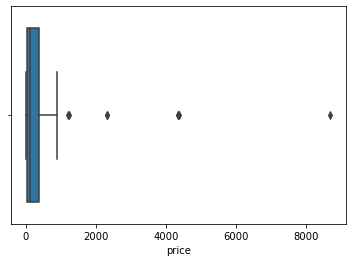

In [13]:
sns.boxplot(x=MonthlyOrders['price'])

In [14]:
MonthlyOrders.columns

Index(['Product title En', 'Product type', 'Delivery Date', 'price',
       'quantity', 'Store Id', 'product categoury', 'city', 'user id',
       'order id'],
      dtype='object')

In [15]:
MonthlyOrders['city'].value_counts()

Giza      25
Cairo     24
Fayoum    22
Name: city, dtype: int64

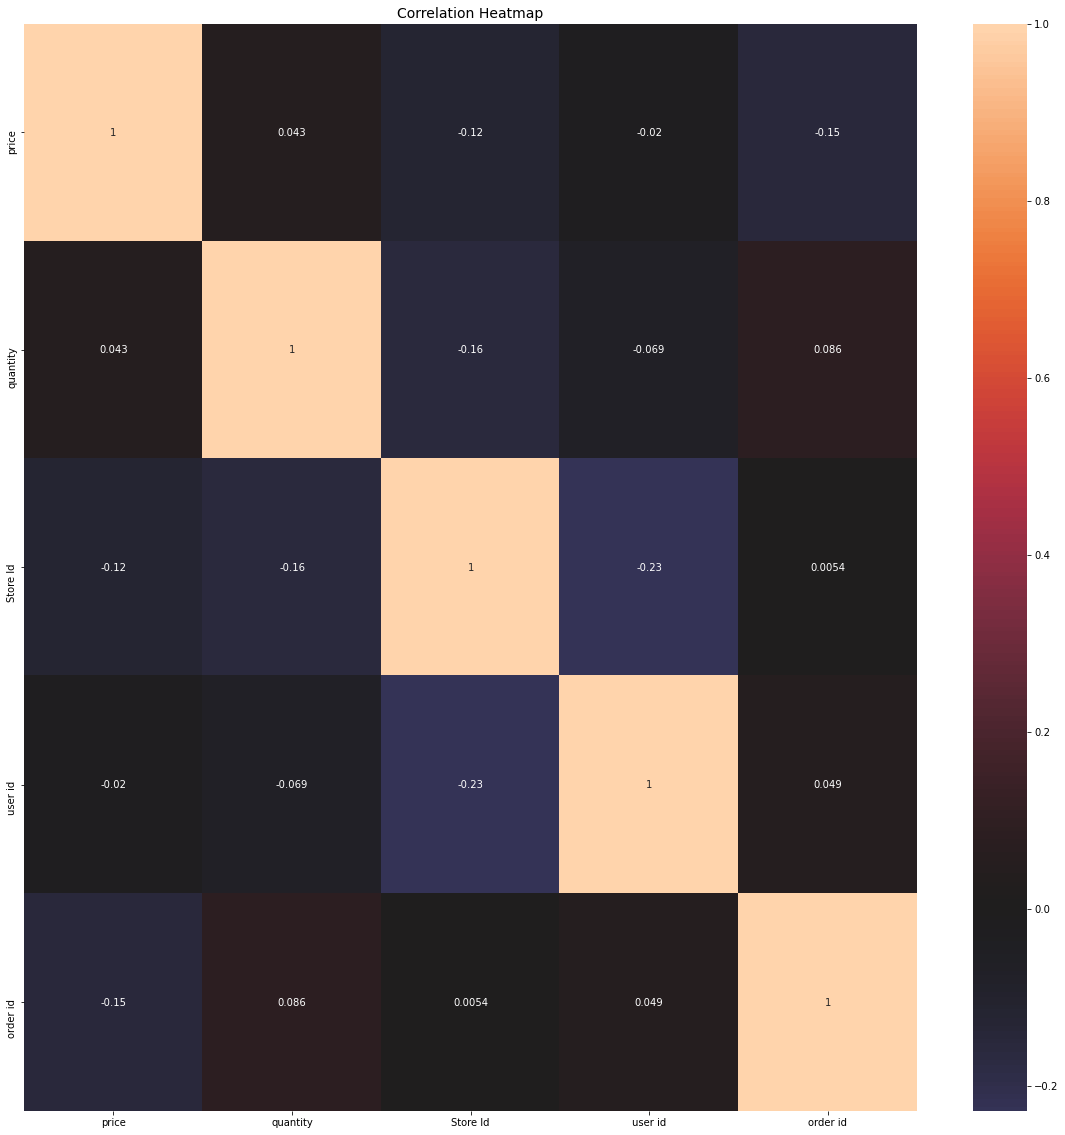

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(MonthlyOrders.corr(), annot=True, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

### What was the best year for sales? How much was earned in that best year?


In [17]:
MonthlyOrders["day"] = MonthlyOrders['Delivery Date'].map(lambda x: x.day)
MonthlyOrders["month"] = MonthlyOrders['Delivery Date'].map(lambda x: x.month)
MonthlyOrders["year"] = MonthlyOrders['Delivery Date'].map(lambda x: x.year)

In [18]:
MonthlyOrders

,Product title En,Product type,Delivery Date,price,quantity,Store Id,product categoury,city,user id,order id,day,month,year
0,bicycle.,sporting,2022-02-01 00:09:31,200.0,1,322,BabyToys,Cairo,300,500,1,2,2022
1,train.,Gaming,2022-02-01 00:18:56,100.0,5,323,Entertainment,Giza,301,502,1,2,2022
2,doll.,Gaming,2022-02-01 00:18:56,132.0,7,323,BabyToys,Giza,301,502,1,2,2022
3,ball.,Gaming,2022-02-01 00:47:47,232.0,2,322,Entertainment,Cairo,302,503,1,2,2022
4,teddy bear.,Baby Toys,2022-02-01 00:53:15,212.0,8,323,Games,Giza,301,504,1,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,doll.,Gaming,2022-02-01 00:09:31,432.0,1,323,Entertainment,Giza,301,532,1,2,2022
67,ball.,Gaming,2022-02-01 00:18:56,32.0,3,322,BabyToys,Cairo,301,532,1,2,2022
68,train.,Gaming,2022-02-01 00:18:56,23.0,3,323,Entertainment,Giza,302,532,1,2,2022
69,doll.,Gaming,2022-02-01 00:47:47,23.0,5,311,Games,Fayoum,301,532,1,2,2022


In [19]:
best_year = MonthlyOrders.groupby('year').sum()
best_year

,price,quantity,Store Id,user id,order id,day,month
year,,,,,,,
2020,930.0,25,1923,1809,3132,6,12
2021,2920.0,33,1912,1807,3117,6,12
2022,35831.3,304,18810,17797,30947,59,118


Text(0, 0.5, 'Sales')

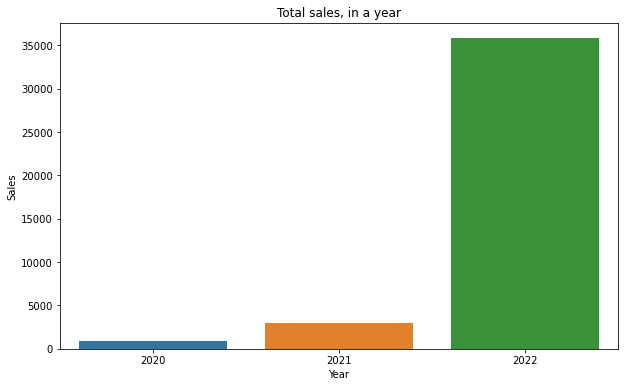

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total sales, in a year")

# Bar chart showing average sales in each month
sns.barplot(x=best_year.index, y=best_year.price)

plt.xlabel('Year')
plt.ylabel('Sales')

In [21]:
MonthlyOrders.columns

Index(['Product title En', 'Product type', 'Delivery Date', 'price',
       'quantity', 'Store Id', 'product categoury', 'city', 'user id',
       'order id', 'day', 'month', 'year'],
      dtype='object')

### What product type had the highest sales ?

In [22]:
MonthlyOrders['Product type'].unique()

array(['sporting', 'Gaming', 'Baby Toys', 'puzzle'], dtype=object)

In [23]:
best_product_type = MonthlyOrders.groupby('Product type').sum()
best_product_type

,price,quantity,Store Id,user id,order id,day,month,year
Product type,,,,,,,,
Baby Toys,1895.0,63,3168,3014,5233,10,20,20220
Gaming,18212.0,200,12844,12062,20985,40,80,80867
puzzle,14881.0,54,3144,3017,5237,10,20,20220
sporting,4693.3,45,3489,3320,5741,11,22,22237


In [24]:
best_product_type.price.max()

18212.0

In [25]:
best_product_type.index[best_product_type.quantity == best_product_type.quantity.max()]


Index(['Gaming'], dtype='object', name='Product type')

Text(83.125, 0.5, 'Sales')

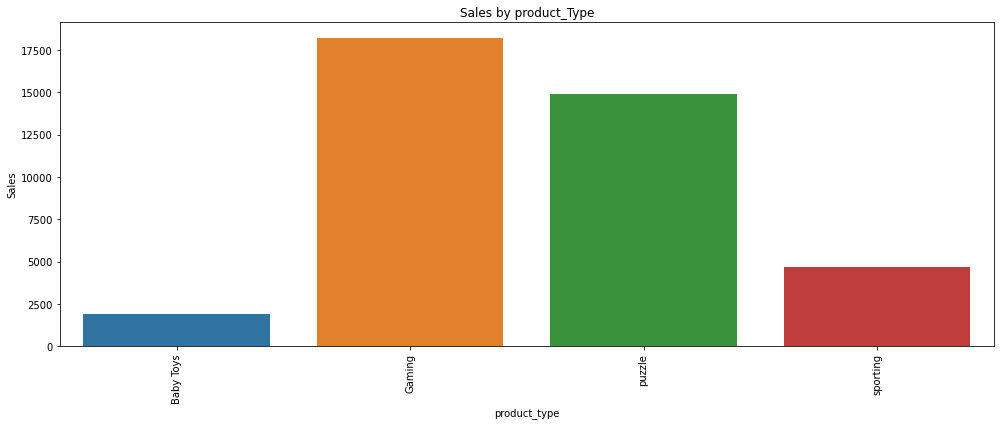

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Sales by product_Type")

# Bar chart showing average sales in each product_title
sns.barplot(x=best_product_type.index, y=best_product_type.price)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('product_type')
plt.ylabel('Sales')

Text(95.875, 0.5, 'Quantities')

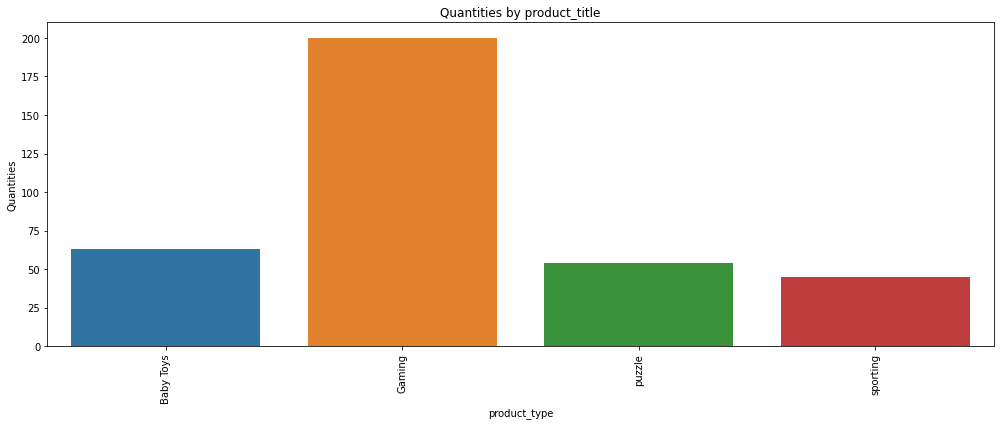

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Quantities by product_title")

# Bar chart showing average sales in each product_title
sns.barplot(x=best_product_type.index, y=best_product_type.quantity)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('product_type')
plt.ylabel('Quantities')

##  Gaming is the highest quantity and price

### what Product title had the highest sales?

In [28]:
MonthlyOrders.columns

Index(['Product title En', 'Product type', 'Delivery Date', 'price',
       'quantity', 'Store Id', 'product categoury', 'city', 'user id',
       'order id', 'day', 'month', 'year'],
      dtype='object')

In [29]:
MonthlyOrders['Product title En'].unique()

array(['bicycle.', 'train.', 'doll.', 'ball.', 'teddy bear.', 'kite.',
       'rubber ducky.', 'airplane.', 'Stuffed Mickey Mouse',
       'Finger Paint', 'Sock Monkey', 'Buck Rogers Rocket Pistol',
       'Microscope Set', 'Beach Ball', 'Red Ryder BB Gun', 'Army Men',
       'View-Master', 'Bubble Solution', 'Little Golden Books', 'Slinky',
       'Magic 8 Ball', 'Legos', 'Water Balloon', 'Silly Putty',
       'Fisher-Price Little People', 'Colorforms', 'Paint-by-Numbers Kit',
       'Mr. Potato Head', 'Wiffle Ball', 'Matchbox Car', 'PEZ Dispenser',
       'Gumby', 'Play-Doh', 'Tonka Truck', 'Frisbee', 'Corn Popper',
       'Two-Handed Pogo Stick', 'Hula Hoop', 'Barbie', 'Troll Doll',
       'Plarail Toy Train', 'Chatty Cathy', 'Fake Vomit', 'Etch A Sketch',
       'Rock-a-Stack', 'Ken', "Slip 'n Slide", 'Chatter Telephone',
       'G.I. Joe', 'Easy-Bake Oven', 'Creepy Crawlers',
       "Rock'em Sock'em Robots", 'Johnny Seven O.M.A.', "See 'n Say",
       'SuperBall', 'Barrel of Monke

In [30]:
best_product_title = MonthlyOrders.groupby('Product title En').sum()
best_product_title

,price,quantity,Store Id,user id,order id,day,month,year
Product title En,,,,,,,,
Army Men,121.0,7,323,301,513,1,2,2021
Barbie,3.0,7,322,301,532,1,2,2021
Barbie's Dream House,231.0,8,323,302,532,1,2,2022
Barrel of Monkeys,32.0,5,323,302,532,1,2,2022
Beach Ball,232.0,7,322,300,511,1,2,2020
...,...,...,...,...,...,...,...,...
doll.,810.0,14,1268,1206,2098,4,8,8088
kite.,121.0,3,311,303,505,1,2,2022
rubber ducky.,211.3,3,311,303,505,1,2,2022


In [31]:
best_product_title.price.max()

8689.0

In [32]:
best_product_title.index[best_product_title.quantity == best_product_title.quantity.max()]


Index(['ball.'], dtype='object', name='Product title En')

In [33]:
best_product_title.quantity.max()

17

Text(89.5, 0.5, 'Sales')

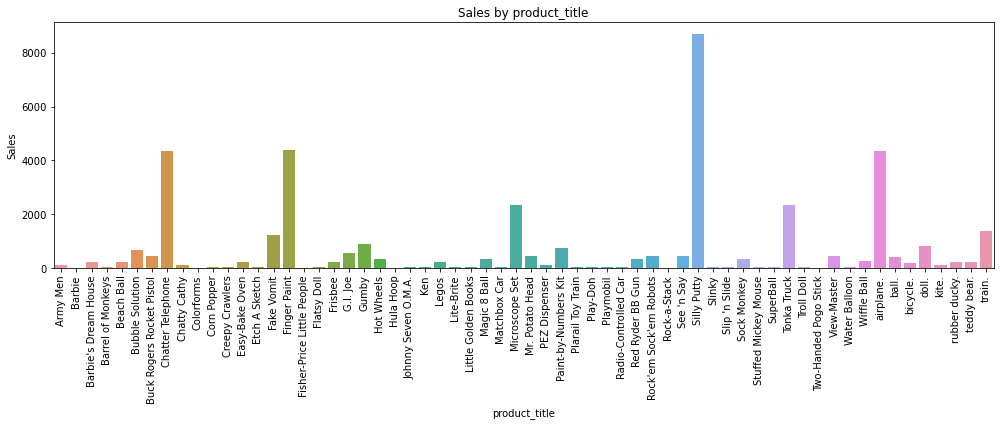

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Sales by product_title")

# Bar chart showing average sales in each product_title
sns.barplot(x=best_product_title.index, y=best_product_title.price)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('product_title')
plt.ylabel('Sales')

Text(102.25, 0.5, 'Quantities')

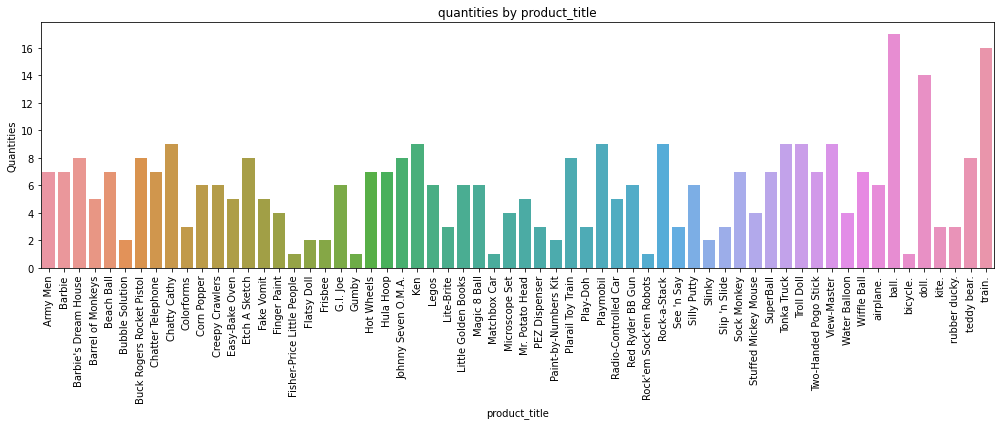

In [35]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("quantities by product_title")

# Bar chart showing average sales in each product_title
sns.barplot(x=best_product_title.index, y=best_product_title.quantity)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('product_title')
plt.ylabel('Quantities')

## ball is the highest quantity and price

### What city had the highest sales ?

In [36]:
MonthlyOrders.city.unique()

array(['Cairo', 'Giza', 'Fayoum'], dtype=object)

In [37]:
best_city = MonthlyOrders.groupby('city').sum()
best_city

,price,quantity,Store Id,user id,order id,day,month,year
city,,,,,,,,
Cairo,13694.0,106,7728,7235,12570,24,48,48520
Fayoum,17328.3,126,6842,6643,11524,22,44,44480
Giza,8659.0,130,8075,7535,13102,25,50,50544


In [38]:
best_city.index[best_city.price == best_city.price.max()]


Index(['Fayoum'], dtype='object', name='city')

In [39]:
best_city.price.max()

17328.3

### Fayoum city had the highest price, with sales of 17328.3

In [40]:
best_city.index[best_city.quantity == best_city.quantity.max()]


Index(['Giza'], dtype='object', name='city')

In [41]:
best_city.quantity.max()


130

### Giza city had the highest quantity with 130 

Text(83.125, 0.5, 'Sales')

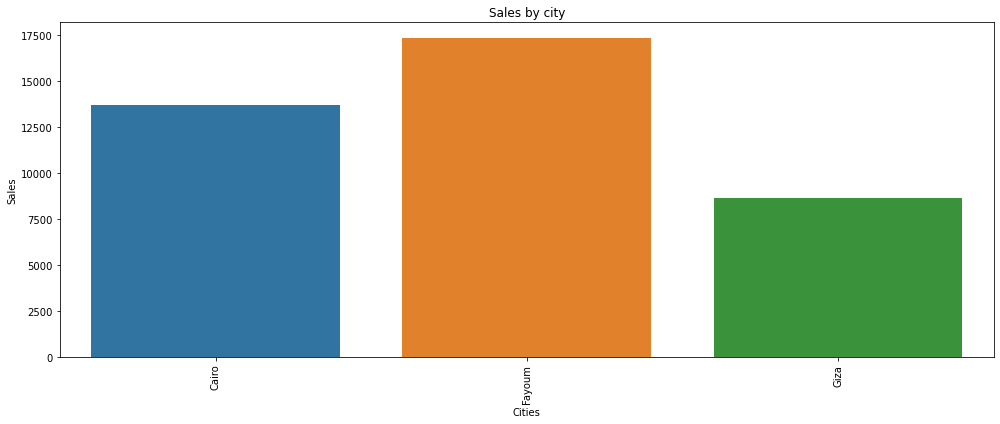

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Sales by city")

# Bar chart showing average sales in each city
sns.barplot(x=best_city.index, y=best_city.price)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Cities')
plt.ylabel('Sales')

Text(95.875, 0.5, 'Quantities')

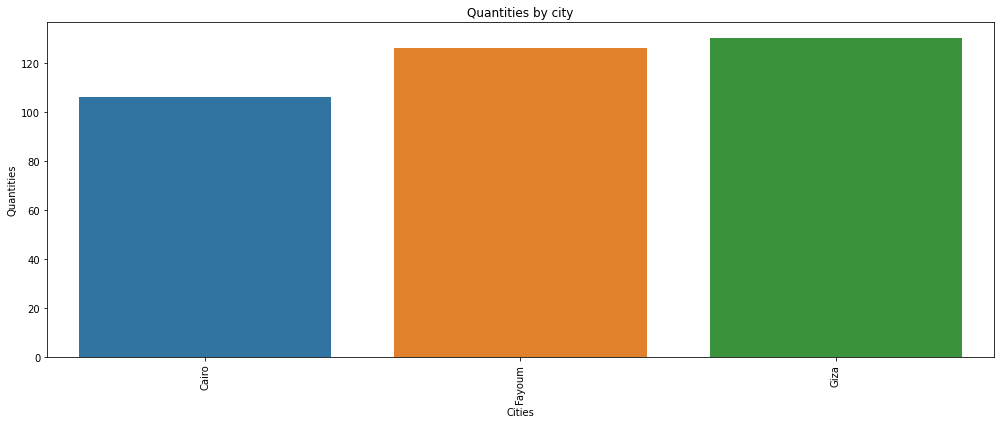

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Quantities by city")

# Bar chart showing average quantity in each city
sns.barplot(x=best_city.index, y=best_city.quantity)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Cities')
plt.ylabel('Quantities')

### As you can observe, Giza had way higher Quantity than any other cities but fewer sales
### But still no big difference between them.

In [44]:
# The mean sales per city
mean_sales = MonthlyOrders.groupby('city').mean()['price']
mean_sales

city
Cairo     570.583333
Fayoum    787.650000
Giza      346.360000
Name: price, dtype: float64